<a href="https://colab.research.google.com/github/vicente-gonzalez-ruiz/learned_image_compression/blob/main/notebooks/03__two_layers_AE_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# AutoEncoder (no convolutional layers)
# https://blog.paperspace.com/autoencoder-image-compression-keras/

       input                                                                      output
    +---------+                                                                 +---------+
    | 28x28x1 |                                                                 | 28x28x1 |
    +---------+                                                                 +---------+
         | flatten()                                                                 ^ reshape(28, 28, 1)
         v                                                                           |
     +-------+                                                                   +-------+
     | 28*28 |                                                                   | 28*28 |
     +-------+                                                                   +-------+
         | dense(activation="leaky_relu")                                              ^
         v                                                                               | dense(activation="leaky_relu")
     +-----+ dense(activation="leaky_relu") +----+ dense(activation="leaky_relu") +-----+
     | 300 |--------------------------------->| 32 |--------------------------------->| 300 |
     +-----+                                  +----+                                  +-----+
                                           code layer
    <---------------------------------------------->
           encoder             decoder
                                              <--------------------------------------------->

Model: "encoder_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 784)]             0         
                                                                 
 encoder_dense_1 (Dense)     (None, 300)               235500    
                                                                 
 encoder_leakyrelu_1 (Leaky  (None, 300)               0         
 ReLU)                                                           
                                                                 
 encoder_dense_2 (Dense)     (None, 2)                 602       
                                                                 
 encoder_output (LeakyReLU)  (None, 2)                 0         
                                                                 
Total params: 236102 (922.27 KB)
Trainable params: 236102 (922.27 KB)
Non-trainable params: 0 (0.00 Byte)
_____________

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/20
235/235 [==============================] - 11s 7ms/step - loss: 0.0583 - val_loss: 0.0542
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0532 - val_loss: 0.0522
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0516 - val_loss: 0.0510
Epoch 4/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0503 - val_loss: 0.0497
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0490 - val_loss: 0.0485
Epoch 6/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0481 - val_loss: 0.0481
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0474 - val_loss: 0.0472
Epoch 8/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0468 - val_loss: 0.0470
Epoch 9/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0465 - val_loss: 0.0467
Epoch 10/20
235/235 [=============

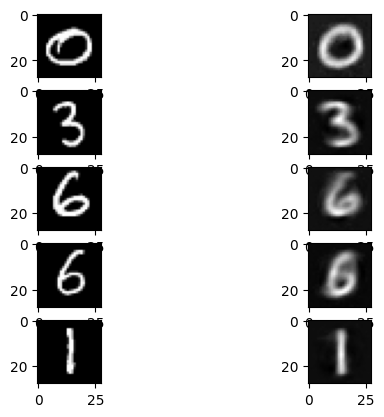

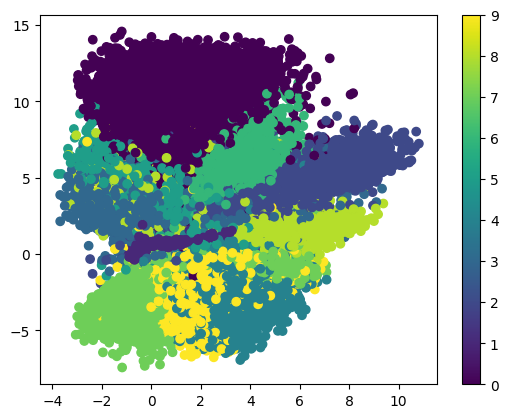

In [ ]:
import tensorflow.keras.layers
import tensorflow.keras.models
import tensorflow.keras.optimizers
import tensorflow.keras.datasets
import numpy
import matplotlib.pyplot

# Encoder
x = tensorflow.keras.layers.Input(shape=(784), name="encoder_input")

encoder_dense_layer1 = tensorflow.keras.layers.Dense(units=300, name="encoder_dense_1")(x)
encoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_1")(encoder_dense_layer1)

encoder_dense_layer2 = tensorflow.keras.layers.Dense(units=2, name="encoder_dense_2")(encoder_activ_layer1)
encoder_output = tensorflow.keras.layers.LeakyReLU(name="encoder_output")(encoder_dense_layer2)

encoder = tensorflow.keras.models.Model(x, encoder_output, name="encoder_model")
encoder.summary()

# Decoder
decoder_input = tensorflow.keras.layers.Input(shape=(2), name="decoder_input")

decoder_dense_layer1 = tensorflow.keras.layers.Dense(units=300, name="decoder_dense_1")(decoder_input)
decoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_1")(decoder_dense_layer1)

decoder_dense_layer2 = tensorflow.keras.layers.Dense(units=784, name="decoder_dense_2")(decoder_activ_layer1)
decoder_output = tensorflow.keras.layers.LeakyReLU(name="decoder_output")(decoder_dense_layer2)

decoder = tensorflow.keras.models.Model(decoder_input, decoder_output, name="decoder_model")
decoder.summary()

# Autoencoder
ae_input = tensorflow.keras.layers.Input(shape=(784), name="AE_input")
ae_encoder_output = encoder(ae_input)
ae_decoder_output = decoder(ae_encoder_output)

ae = tensorflow.keras.models.Model(ae_input, ae_decoder_output, name="AE")
ae.summary()

# RMSE
def rmse(y_true, y_predict):
    return tensorflow.keras.backend.mean(tensorflow.keras.backend.square(y_true-y_predict))

# AE Compilation
ae.compile(loss="mse", optimizer=tensorflow.keras.optimizers.Adam(lr=0.0005))

# Preparing MNIST Dataset
(x_train_orig, y_train), (x_test_orig, y_test) = tensorflow.keras.datasets.mnist.load_data()
x_train_orig = x_train_orig.astype("float32") / 255.0
x_test_orig = x_test_orig.astype("float32") / 255.0

x_train = numpy.reshape(x_train_orig, newshape=(x_train_orig.shape[0], numpy.prod(x_train_orig.shape[1:])))
x_test = numpy.reshape(x_test_orig, newshape=(x_test_orig.shape[0], numpy.prod(x_test_orig.shape[1:])))

# Training AE
ae.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

encoded_images = encoder.predict(x_train)
decoded_images = decoder.predict(encoded_images)
decoded_images_orig = numpy.reshape(decoded_images, newshape=(decoded_images.shape[0], 28, 28))

num_images_to_show = 5
for im_ind in range(num_images_to_show):
    plot_ind = im_ind*2 + 1
    rand_ind = numpy.random.randint(low=0, high=x_train.shape[0])
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind)
    matplotlib.pyplot.imshow(x_train_orig[rand_ind, :, :], cmap="gray")
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind+1)
    matplotlib.pyplot.imshow(decoded_images_orig[rand_ind, :, :], cmap="gray")

matplotlib.pyplot.figure()
matplotlib.pyplot.scatter(encoded_images[:, 0], encoded_images[:, 1], c=y_train)
matplotlib.pyplot.colorbar()